# Prvo domaći iz Genetskih Algoritama


## Miloš Milunović RN 17/2016 grupa 302


---


*   Binarni genetski algoritam
*   Dvotačkasto ukrštanje
*   Inverzija
*   Levijeva funkcija broj 13


\begin{equation}
f(x, y) = sin^2 3πx + (x − 1)^2(1 + sin^2 3πy) + (y − 1)^2(1 + sin^2 2πy) \\
interval  -10 < x, y < 10, minimum f(1,1) = 0 
\end{equation}


# 1. Biblioteke

In [0]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
import math

from mpl_toolkits import mplot3d

pi = 3.1415



# 2. Definicija Levijeve funkcije

In [0]:
def levy_function(chromosome):
  x = chromosome[0]
  y = chromosome[1] 
  
  tmp1 = math.pow(math.sin(3*pi*x), 2)
  tmp2 = math.pow((x - 1), 2) * (1 + math.pow(math.sin(3*pi*y), 2))
  tmp3 = math.pow((y - 1), 2) * (1 + math.pow(math.sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3


# 2.1. 3D Prikaz funkcije

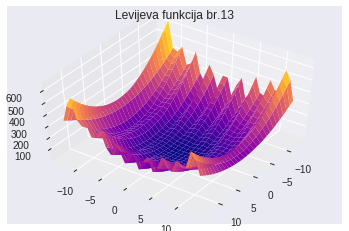

In [0]:
def l_show(x, y):
  tmp1 = math.pow(math.sin(3*pi*x), 2)
  tmp2 = math.pow((x - 1), 2) * (1 + math.pow(math.sin(3*pi*y), 2))
  tmp3 = math.pow((y - 1), 2) * (1 + math.pow(math.sin(2*pi*y), 2))

  return tmp1 + tmp2 + tmp3

levy_vectorized = np.vectorize(l_show)

x = np.linspace(-13, 13, 30)
y = np.linspace(-13, 13, 30)

X, Y = np.meshgrid(x, y)
Z = levy_vectorized(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='plasma', edgecolor='none')
ax.set_title('Levijeva funkcija br.13');

ax.view_init(50, 35)





# 3. Funkcija za kodovanje i dekodovanje hromozoma


In [0]:

def bin_encode(chromosome, bin_val, min_val, precision):
  
  ret = ""
  for g in chromosome:
    val = round((g - min_val)/bin_val)  
    ret += bin(val)[2:].rjust(precision,'0')
  return ret

def bin_encode_chromosomes(chromosomes, precision, max_val, min_val):
  
  bin_val = (max_val - min_val) / (2**precision-1) 
  
  bin_chromosomes = [ bin_encode(c, bin_val, min_val, precision) for c in chromosomes]
  return bin_chromosomes



def bin_decode(chromosome, bin_val, min_val, precision):

  ret = []
  for idx in range(0, len(chromosome), precision):
    g = int(chromosome[idx:idx + precision], 2)
    ret.append(g * bin_val + min_val)
    
  return ret

def bin_decode_chromosomes(chromosomes, precision, max_val, min_val):
  
  bin_val = (max_val - min_val) / (2**precision-1) 

  bin_chromosomes = [ bin_decode(c, bin_val, min_val, precision) for c in chromosomes]
  return bin_chromosomes




# 4. Funkcija za dvotačkasto ukrštanje
Nasumično biramo dve tačke ukrštanja. Novi hromozomi (h3, h4) će biti sastavljeni od delova ulaznih hromozoma (h1, h2). I to na sledeći način:

> * h3 dobija genetski materijal od h1 od početka do prve presečne tačke i od druge presečne tačke do kraja 
a genetski materijal od h2 dobija od prve do druge presečne tačke


> * h4 dobija genetski materijal od h2 od početka do prve presečne tačke i od druge presečne tačke do kraja 
a genetski materijal od h1 dobija od prve do druge presečne tačke





In [0]:
def two_point_crossover(pairs):
  length = len(pairs[0])
  children = []
  
  for (a,b) in pairs:  
   
      r1 = random.randrange(0, length)
      r2 = random.randrange(0, length)
      
      if r1 < r2:
        children.append(a[:r1] + b[r1:r2] + a[r2:])
        children.append(b[:r1] + a[r1:r2] + b[r2:])
      else:
        children.append(a[:r2] + b[r2:r1] + a[r1:])
        children.append(b[:r2] + a[r2:r1] + b[r1:])
    
  return children  

# 5. Mutacija inverzijom

Nasumično biramo dve  tačke u hromozomu i genetski materijal koji se nalazi između te dve tačke invertujemo.



> primer: h = [ 1110101000 ]
<br>nasumično izabrani indeksi: r1 = 3, r2 = 6
<br>rezultat nakon mutacije: [1111010000]



In [0]:
def inv_mutation(chromosomes, mutation_rate):
  mutated_chromosomes = []
  
  for chromosome in chromosomes:
    
    if random.random() < mutation_rate:
      r1 = random.randrange(0, len(chromosome) - 1)
      r2 = random.randrange(0, len(chromosome) - 1)
      
      if r1 < r2:
        mutated_chromosomes.append(chromosome[:r1] + chromosome[r1:r2][::-1] + chromosome[r2:])
      else:
        mutated_chromosomes.append(chromosome[:r2] + chromosome[r2:r1][::-1] + chromosome[r1:])
        
    else:
      mutated_chromosomes.append(chromosome)
      

  return mutated_chromosomes

# 6. Generisanje populacije


In [0]:
def generate_inital_chromosomes(length, max, min, pop_size):
  return [ [random.uniform(min,max) for j in range(length)] for i in range(pop_size)]

def population_stats(costs):
  return costs[0], sum(costs)/len(costs)


# 7. Funkcije za rangiranje i odabir hromozoma

Jedinke se rangiraju po vrednosti funkcije troška funkcijom **rank_chromosomes**.</br>
Zatim se funkcijom **natural_selection** ostavljamo samo prvih *n_keep* jedinki.</br>
Funkcija **pairing** uparuje roditeljske hromozome po principu najbolji i sledeći najbolji...

In [0]:

def rank_chromosomes(cost, chromosomes):
  costs = list(map(cost, chromosomes))
  ranked  = sorted( list(zip(chromosomes,costs)), key = lambda c:c[1])
  
  return list(zip(*ranked))

def natural_selection(chromosomes, n_keep):
  return chromosomes[:n_keep]

def pairing(parents):
  pairs = []
  i = 0
  for i in range(0, len(parents), 2):
    pairs.append([parents[i], parents[i+1]])
      
  return pairs

# 8. Main loop - sklopljen genetski algoritam
- Generišemo početnu populaciju veličine *population_size* 
- Vrtimo glavnu petlju maksimalno *max_iter* puta, svaka iteracija petlje je jedna generacija
- Rangiramo jedinke po prilagođenosti, funkcijom **rank_chromosomes**
- Funkcijom **natural_selection** biramo roditelje
- Funkcijom **bin_encode_chromosomes** kodujemo celu roditeljsku populaciju
- Funkcijom **pairing** odvajamo parove roditeljskih hromozoma koje ćemo ukrstiti
- Metodom *dvotačkastog ukrštanja*, tj funkcijom **two_point_crossover** uparujemo roditeljske hromozome i dobijemo populaciju dece
- Spajamo novonastale hromozome sa roditeljskim u novu populaciju *chromosomes* 
- Na ovoj populaciji vršimo *inverznu mutaciju* funkcijom **inv_mutation** sa zadatim *mutation_rate = 0.3*
- Dekodujemo celu populaciju funkcijom **bin_decode_chromosomes**
- Proveravamo da li populacija konvergira ili da li smo došli do optimalnog rešenja
- Ispisujemo statistike za svaku generaciju: prosečna prilagođenost, najbolji hromozom i sastav najboljeg hromozoma

In [0]:
def genetic(cost_func , extent, population_size, mutation_rate = 0.3, chromosome_length = 2, precision = 13, max_iter = 500):
  
  min_val = extent[0]
  max_val = extent[1]
  
  
  avg_list = []
  best_list = []
  curr_best = 10000
  same_best_count = 0
  
  chromosomes = generate_inital_chromosomes(chromosome_length, max_val, min_val, population_size)
 
  for iter in range(max_iter):
      
    ranked, costs = rank_chromosomes(cost_func, chromosomes) 
    
    best, average = population_stats(costs)
    
    parents = natural_selection(ranked, population_size)
    
    parents = bin_encode_chromosomes(parents, precision, max_val, min_val)  
    
    pairs = pairing(parents)   
    
    children = two_point_crossover(pairs)
    chromosomes = parents + children    
    
    chromosomes = inv_mutation(chromosomes, mutation_rate)

    chromosomes = bin_decode_chromosomes(chromosomes, precision, max_val, min_val)
    
    
    print("Generation: ",iter+1," Average: {:.3f}".format(average)," Curr best: {:.3f}".format(best), 
          "[X, Y] = {:.3f} {:.3f}".format(chromosomes[0][0],chromosomes[0][1]))
    print("-------------------------")
    
    avg_list.append(average)
    if best < curr_best:
      best_list.append(best)
      curr_best = best
      same_best_count = 0
    else:
      same_best_count += 1
      best_list.append(best)
      
    
    if(cost_func(chromosomes[0]) < 0.05):
      
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
     
      print("\nSolution found ! Chromosome content: [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      return
        
    if same_best_count > 20:
      print("\nStopped due to convergance.Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
      
      return
    
    if iter == 499:
      avg_list = avg_list[:iter]
      best_list = best_list[:iter]
      all_avg_list.append(avg_list)
      all_best_list.append(best_list)
      generations_list.append(iter)
      
      print("\nStopped due to max number of iterations, solution not found. Best chromosome [X, Y] = {:.3f} {:.3f}\n".format(chromosomes[0][0],chromosomes[0][1]))
      

   

# 9. Iscrtavanje grafikona</br>
Iscrtavamo prosečnu i najbolji prilagođenost za svaku generaciju.

In [0]:
def display_stats(all_avg_list, all_best_list, generations_list):
  
  c = 0
  colors = ['red', 'green', 'blue', 'yellow', 'orange']
  
  for average_list in all_avg_list:
      x_axis = list(range(generations_list[c]))
      y_axis = average_list
      plt.plot(x_axis, y_axis, linewidth=3, color=colors[c], label=str(c + 1))
      plt.title('Average cost function value', fontsize=19)
      plt.xlabel('Generation', fontsize=10)
      plt.ylabel('Cost function')
      c += 1
  plt.legend(loc='upper right')
  plt.show()

  c = 0

  for best_list in all_best_list:
      x_axis = list(range(generations_list[c]))
      y_axis = best_list
      plt.plot(x_axis, y_axis, color=colors[c], label=str(c + 1))
      plt.title('Best cost function value', fontsize=19)
      plt.xlabel('Generation')
      plt.ylabel('Cost function')
      c += 1
  plt.legend(loc='upper right')
  plt.show()

# 10. Konfigurisanje i poziv genetskog algoritma

Argumenti funkcije:


1.   Funkcija za minimizaciju (u našem slučaju Levy_function) - *function*
2.   Opseg u kome pretražujemo rešenje - *list*
3.   Broj hromozoma - *int*


---

Opcioni argumenti:


4.   Stopa mutacije - *float*
5.   Dužina hromozoma - *int*
6.   Na koliko decimala kodujemo X i Y - *int*
7.   Maksimalni broj iteracija - *int*




In [0]:
number_of_chromosomes = [20, 100, 150]
all_avg_list = []
generations_list = []
all_best_list = []
run_number = 5

for x in number_of_chromosomes:
  
  print("==========================")
  
  for k in range(0, run_number):
    
    print("\n", k + 1, ": run of genetic algorithm with ", x ," chromosomes.\n")    
    genetic(levy_function, [10, -10], x)
    
  display_stats(all_avg_list, all_best_list, generations_list)
  all_best_list = []
  all_avg_list = []
  generations_list = []
